# Generating Edges of Merged Tracks

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
import scipy as sp

sys.path.append("../lightning_modules")

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from torch_geometric.data import Data
from Track_GAN.Models.gan_gnn import GanGNN

In [3]:
with open("Track_GAN_config.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

## Generate Merged Track

In [33]:
def calc_y(x, r, theta, sign):
    return sign*(np.sqrt(r**2 - (x - r*np.cos(theta))**2) - r*np.sin(theta))

In [80]:
# Plot x, y of circle for a range of x
def plot_circle(r, theta, sign, n_points=100):
    x = np.linspace(0, 1, n_points)
    y = calc_y(x, r, theta, sign)
    plt.scatter(x, y)

In [89]:
# Randomly generate r, a, sign
def generate_circle():
    r = np.random.uniform(1, 5)
    theta = np.random.uniform(0, np.pi)
    sign = np.random.choice([-1, 1])
    return r, theta, sign

<ipython-input-33-62e907f0bef4>:2: RuntimeWarning: invalid value encountered in sqrt
  return sign*(np.sqrt(r**2 - (x - r*np.cos(theta))**2) - r*np.sin(theta))


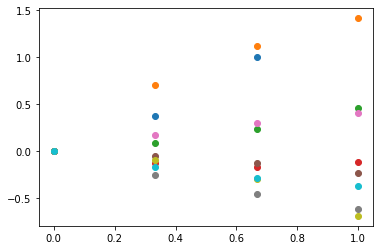

In [90]:
for _ in range(10):
    r, theta, sign = generate_circle()
    plot_circle(r, theta, sign, n_points=4)

In [94]:
edges = np.vstack([np.arange(4), np.arange(1, 4 + 1)])

In [96]:
if np.random.uniform() > 0.5:
    edges = edges[:, ::-1]

In [97]:
edges

array([[3, 2, 1, 0],
       [4, 3, 2, 1]])

In [99]:
from Track_GAN.utils import generate_merged_track

In [141]:
nodes, edges, y = generate_merged_track()

In [142]:
# Plot nodes and edges, with y as the color of edges
def plot_track(nodes, edges, y):
    plt.scatter(nodes[:, 0], nodes[:, 1], c="k")
    for i in range(len(edges[0])):
        if y[i] == 1:
            plt.plot(nodes[edges[:, i], 0], nodes[edges[:, i], 1], c="b")
        else:
            plt.plot(nodes[edges[:, i], 0], nodes[edges[:, i], 1], c="r")

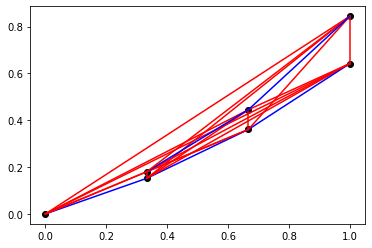

In [143]:
plot_track(nodes, edges, y)

## Training

In [5]:
model = GanGNN(hparams)
logger = WandbLogger(project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"])
logger.watch(model, log="all")
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger)
trainer.fit(model)

/global/homes/d/danieltm/.conda/envs/exatrkx-gpu/lib/python3.8/site-packages/pytorch_lightning/loggers/wandb.py:341: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Setting up dataset


/global/cfs/cdirs/m3443/data/GraphGAN/notebooks/../lightning_modules/Track_GAN/utils.py:46: RuntimeWarning: invalid value encountered in sqrt
  return sign*(np.sqrt(r**2 - (x - r*np.cos(theta))**2) - r*np.sin(theta))
100%|██████████| 10/10 [00:00<00:00, 119.48it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | generator     | GeneratorGNN     | 399 K 
1 | discriminator | DiscriminatorGNN | 300 K 
---------------------------------------------------
699 K     Trainable params
0         Non-trainable params
699 K     Total params
2.799     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/global/homes/d/danieltm/.conda/envs/exatrkx-gpu/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.conda/envs/exatrkx-gpu/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/global/homes/d/danieltm/.conda/envs/exatrkx-gpu/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve perfor

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/global/homes/d/danieltm/.conda/envs/exatrkx-gpu/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


## Visualise Examples

In [16]:
from matplotlib.pyplot import cm

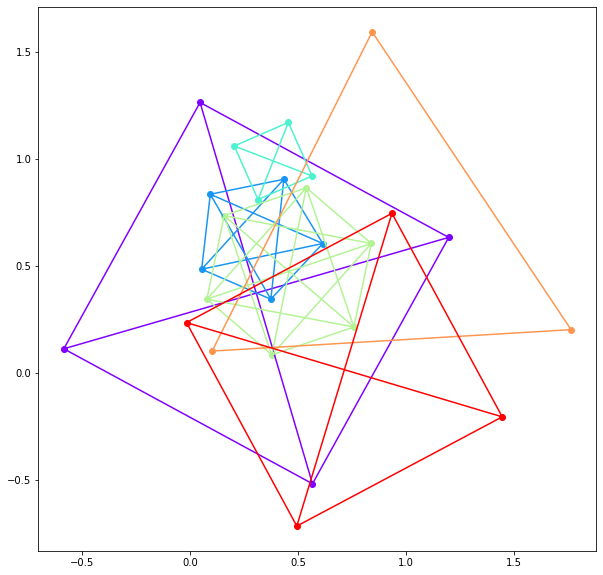

In [17]:
n=6

color = iter(cm.rainbow(np.linspace(0, 1, n)))

plt.figure(figsize=(10,10))
for polygon in model.valset[:n]:
    c = next(color)
    plt.scatter(polygon.x.T[0], polygon.x.T[1], color=c);
    plt.plot(polygon.x[:, 0][polygon.edge_index], polygon.x[:, 1][polygon.edge_index], c=c); 
    